# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [255]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

In [256]:
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [257]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [258]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [259]:
penguins_clean = penguins_df.dropna()
penguins_clean.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [260]:
penguins_df['flipper_length_mm'].describe()

count     342.000000
mean      214.014620
std       260.558057
min      -132.000000
25%       190.000000
50%       197.000000
75%       213.750000
max      5000.000000
Name: flipper_length_mm, dtype: float64

In [261]:
penguins_df.shape

(344, 5)

In [262]:
penguins_clean = penguins_clean.drop([9, 14])

In [263]:
penguins_clean.shape

(333, 5)

In [264]:
encoder = OneHotEncoder(drop='first')
penguins_clean[['male', 'female']] = encoder.fit_transform(penguins_clean[['sex']]).toarray()
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,male,female
0,39.1,18.7,181.0,3750.0,MALE,0.0,1.0
1,39.5,17.4,186.0,3800.0,FEMALE,1.0,0.0
2,40.3,18.0,195.0,3250.0,FEMALE,1.0,0.0
4,36.7,19.3,193.0,3450.0,FEMALE,1.0,0.0
5,39.3,20.6,190.0,3650.0,MALE,0.0,1.0


In [265]:
penguins_clean.drop(columns=['sex'], inplace=True)
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,male,female
0,39.1,18.7,181.0,3750.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0
2,40.3,18.0,195.0,3250.0,1.0,0.0
4,36.7,19.3,193.0,3450.0,1.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0


In [266]:
scaler = StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins_clean), columns=penguins_clean.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,male,female
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


In [267]:
pca = PCA()
a = pca.fit(penguins_preprocessed)
a.explained_variance_ratio_

array([0.51973484, 0.34424041, 0.08591863, 0.03225427, 0.01686049,
       0.00099136])

In [268]:
n_components = 2
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_clean)

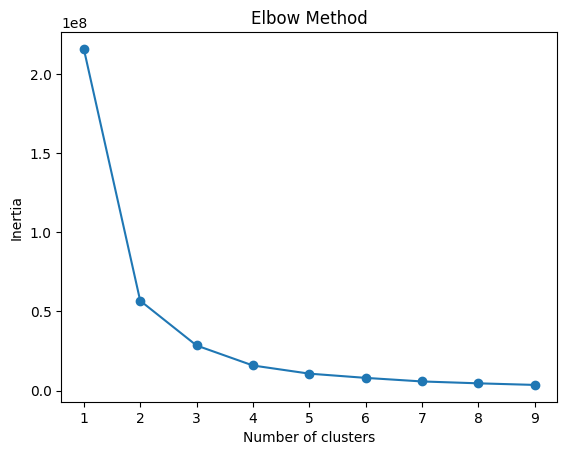

In [269]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

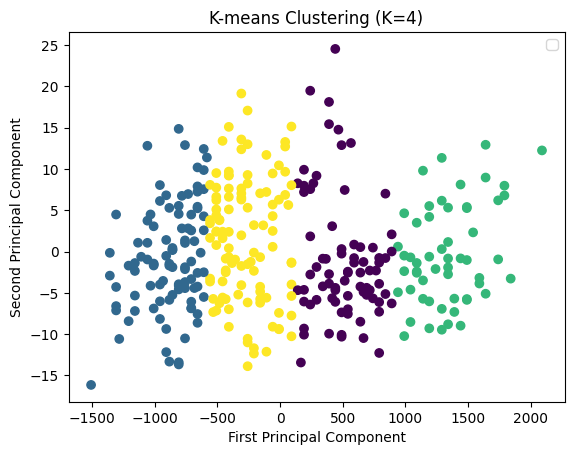

In [270]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [271]:
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,male,female,label
0,39.1,18.7,181.0,3750.0,0.0,1.0,3
1,39.5,17.4,186.0,3800.0,1.0,0.0,3
2,40.3,18.0,195.0,3250.0,1.0,0.0,1
4,36.7,19.3,193.0,3450.0,1.0,0.0,1
5,39.3,20.6,190.0,3650.0,0.0,1.0,3


In [272]:
stat_penguins = penguins_clean[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']].groupby('label').agg('mean')
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,45.445455,15.662338,209.727273
1,40.101053,17.743158,188.557895
2,49.674545,15.725455,221.709091
3,43.570755,18.433962,195.141509
